# **Exploratory data analysis**

## General info

**Project:** Heart disease prediction

**Author:** Maria (GitHub - Stork656)

**Date:** 2025

**Data source:** https://www.kaggle.com/datasets/fedesoriano/heart-failure-prediction 

**Goal:** To analyze dataset characteristics relevant to data preprocessing, including missing values, anomalies, and feature properties required for model development.

## Table of contents

1. [General Info](#General-info)
2. [Imports and settings](#Imports-and-settings)
3. [Load data](#Load-data)
4. [Data overview](#Data-overview)
5. [Feature analysis](#Feature-analysis)
6. [Numerical features analysis](#Numerical-features-analysis)
7. [Target variable analysis](#Target-variable-analysis)
8. [Summary](#Summary)

#### Imports and settings

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pandas.api.types import is_numeric_dtype

#### Load data

In [12]:
path = "../data/raw/heart-diseases.csv"
df = pd.read_csv(path) 
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140.0,289.0,0.0,Normal,172,N,0.0,Up,0.0
1,49,F,NAP,160.0,180.0,0.0,Normal,156,N,1.0,Flat,1.0
2,37,M,ATA,130.0,283.0,0.0,ST,98,N,0.0,Up,0.0
3,48,F,ASY,138.0,214.0,0.0,Normal,108,Y,1.5,Flat,1.0
4,54,M,NAP,150.0,195.0,0.0,Normal,122,N,0.0,Up,0.0


In [13]:
df.tail()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
913,45,M,TA,110.0,264.0,0.0,Normal,132,N,1.2,Flat,1.0
914,68,M,ASY,144.0,193.0,1.0,Normal,141,N,3.4,Flat,1.0
915,57,M,ASY,130.0,131.0,0.0,Normal,115,Y,1.2,Flat,1.0
916,57,F,ATA,130.0,236.0,0.0,LVH,174,N,0.0,Flat,1.0
917,38,M,NAP,138.0,175.0,0.0,Normal,173,N,0.0,Up,0.0


#### Data overview

In [14]:
df.shape

(918, 12)

The dataset contains 918 rows and 12 features.

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       917 non-null    float64
 4   Cholesterol     917 non-null    float64
 5   FastingBS       917 non-null    float64
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    913 non-null    float64
dtypes: float64(5), int64(2), object(5)
memory usage: 86.2+ KB


The dataset contains features of different data types.  Для object потребуется кодировка.

#### Target variable analysis

In [16]:
df.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,917.000000,917.000000,917.000000,918.000000,918.000000,913.000000
mean,53.510893,132.355507,198.749182,0.233370,136.809368,0.887364,0.555312
std,9.432617,18.482498,109.433178,0.423206,25.460334,1.066570,0.497204
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.000000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


In [17]:
df.isna().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         1
Cholesterol       1
FastingBS         1
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      5
dtype: int64

В данных присутствуют пропуски и вероятно, есть выбросы. Но нужно посмотреть природу признаков.

#### Feature analysis

In [18]:
lst_cat ,lst_num, lst_bin = [], [], []
target = 'HeartDisease'

for col in df.drop(columns = [target]).columns:
    if df[col].nunique() == 2:
        lst_bin.append(col)
    elif is_numeric_dtype(df[col]):
        lst_num.append(col)
    else:
        lst_cat.append(col)

print(f'Target: {target}\n')
print(f'Numerical features: {', '.join(lst_num)}\n')
print('Categorical features:')
for f in lst_cat:
    print(f'{df[f].value_counts()}\n')

print('Binary features:')
for f in lst_bin:
    print(f'{df[f].value_counts()}\n')

Target: HeartDisease

Numerical features: Age, RestingBP, Cholesterol, MaxHR, Oldpeak

Categorical features:
ChestPainType
ASY    496
NAP    203
ATA    173
TA      46
Name: count, dtype: int64

RestingECG
Normal    552
LVH       188
ST        178
Name: count, dtype: int64

ST_Slope
Flat    460
Up      395
Down     63
Name: count, dtype: int64

Binary features:
Sex
M    725
F    193
Name: count, dtype: int64

FastingBS
0.0    703
1.0    214
Name: count, dtype: int64

ExerciseAngina
N    547
Y    371
Name: count, dtype: int64



#### Numerical features analysis

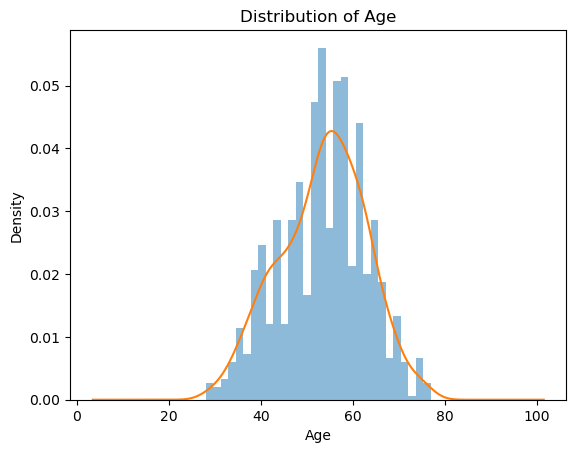

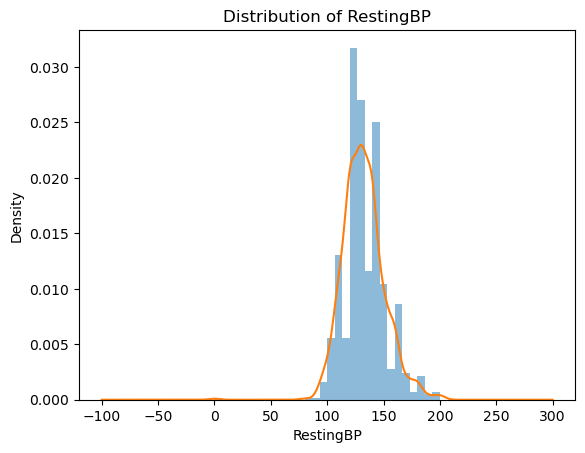

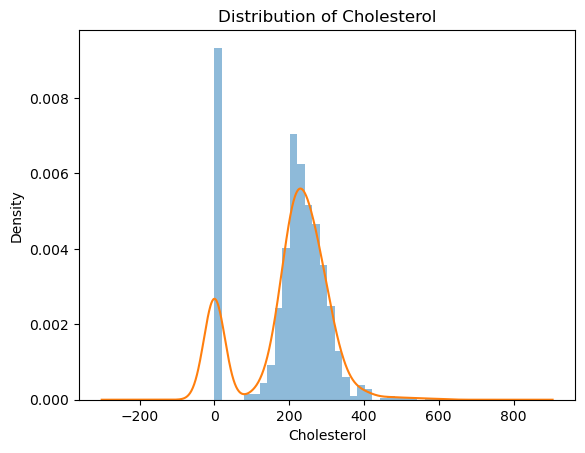

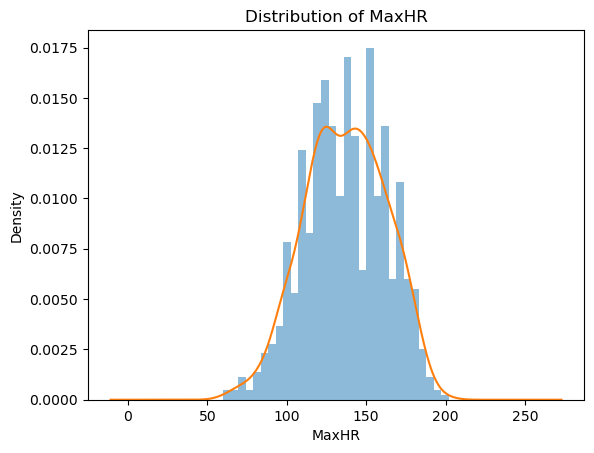

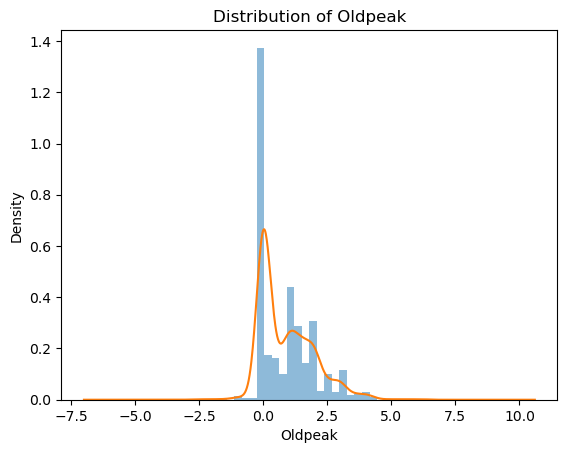

In [19]:
for col in lst_num:
    plt.figure()
    df[col].plot(kind='hist', density=True, bins=30, alpha=0.5)
    df[col].plot(kind='kde')
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.show()

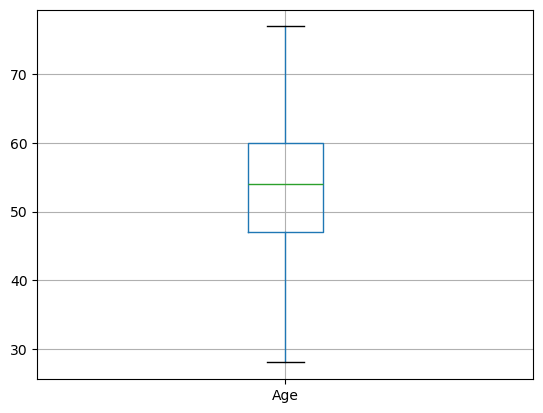

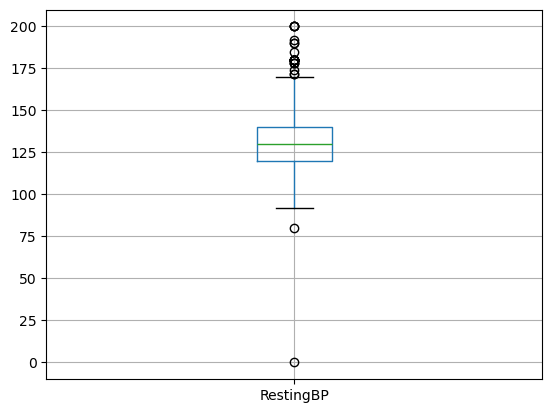

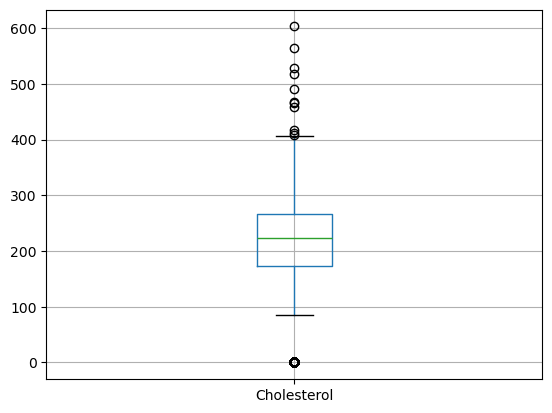

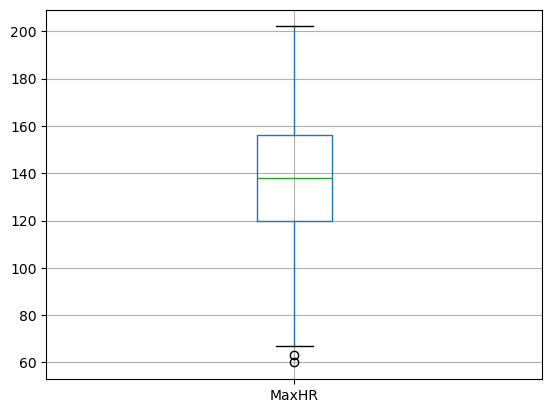

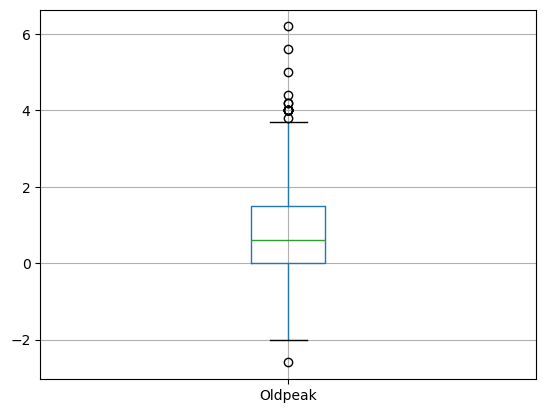

In [20]:
for col in lst_num:
    plt.figure()
    df[[col]].boxplot(grid = True)
    plt.show()

1. Возраст всё ок - выбросов нет. Варьируется приблизительно от 25 до 75 лет.
2. Легкая ассиметрия. Давление - 0 явно выброс, с таким давлением жить не получится. А вот всё, что за верхнюю границу вышло, возможно тяжелая форма болезни и может быть важно при предсказании ССЗ. Пока оставлю.
3. Холестирин - 0 не может быть, уюираем. А вот 600 критично высокий, но не фантастика. Оставлю.
4. Oldpeak есть подазрительные значения, но тоже возможны, оставлю
5. Пульс всё около дела, значения реальные

HeartDisease
1.0    507
0.0    406
Name: count, dtype: int64 



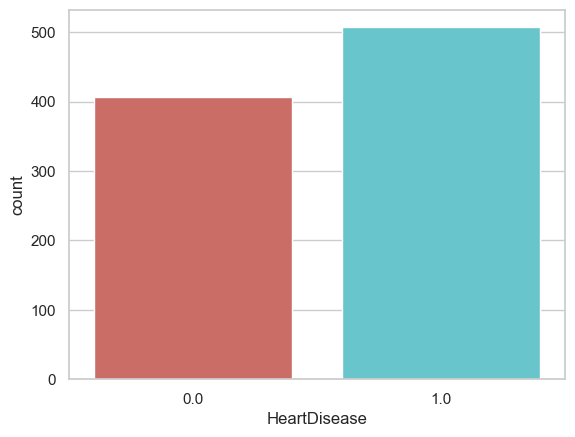

In [21]:
print(df['HeartDisease'].value_counts(),'\n')
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)
y_data = pd.DataFrame(df['HeartDisease'])
sns.countplot(
    x='HeartDisease',
    data=y_data,
    hue='HeartDisease',
    palette='hls',
    legend=False
)
plt.show()

Перекоса по классам сильного нет, балансировка не требуется

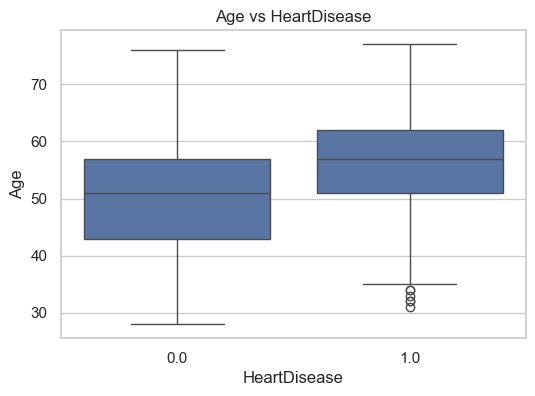

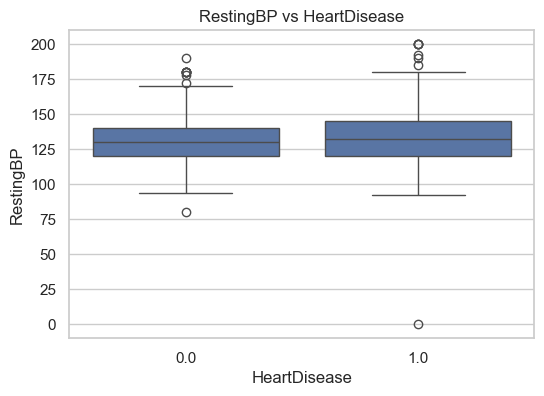

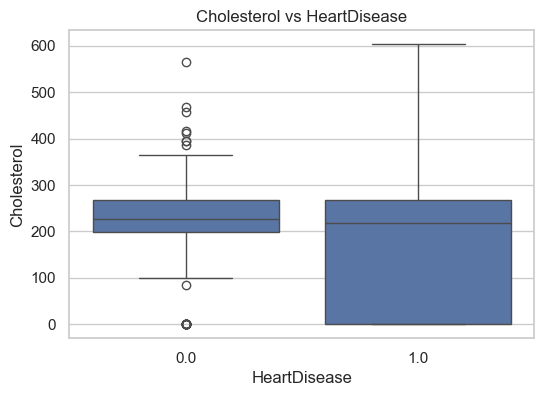

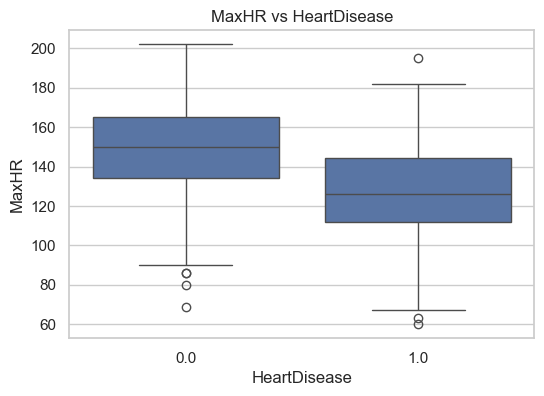

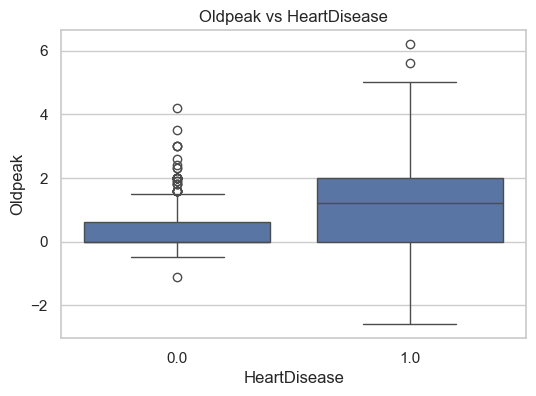

In [22]:
for col in lst_num:
    plt.figure(figsize=(6, 4))
    sns.boxplot(x='HeartDisease', y=col, data=df)
    plt.title(f'{col} vs HeartDisease')
    plt.show()

<Axes: >

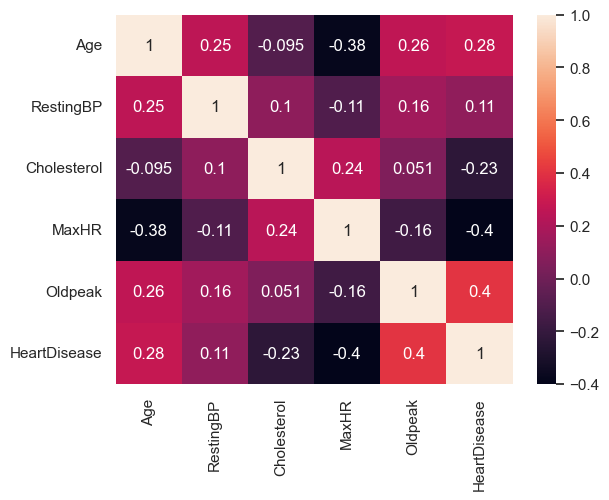

In [28]:
plt.figure()
sns.heatmap(df[lst_num + [target]].corr(), annot=True)

1. У возрастных пациентов болезнь встречается чаще. Признак влиятельный.
2. Давление в среднем у обоих групп одинаковое, возможно непоказателен по графикам, но давление общеизвестный фактор риска. Поэтому оставлю.
3. Холестерин, предполагаю, что различие для экстремальных значений обусловлено шумом. Нужно проверить разброс после очистки заново. Пока влияние признака под вопросом.
4. Пульс у здоровых пациентов выше. Различие наблюдается, признак влиятельный.
5. Oldpeak у больных менее стабилен. Признак влиятельный.

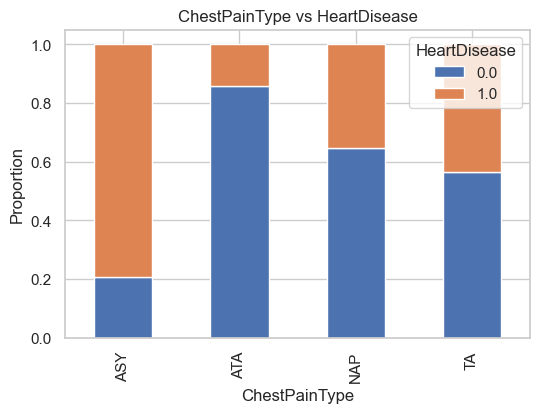

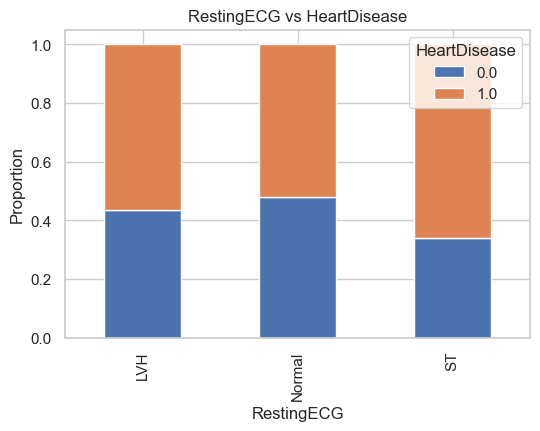

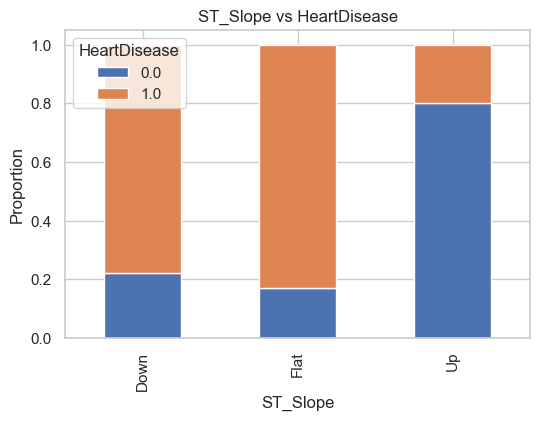

In [23]:
for col in lst_cat:
    ct = pd.crosstab(df[col], df['HeartDisease'], normalize='index')
    ct.plot(kind='bar', stacked=True, figsize=(6,4))
    plt.title(f'{col} vs HeartDisease')
    plt.ylabel('Proportion')
    plt.show()

1. Тип боли в груди сильно разнится у здоровых и больных пациентов. Признак показательный.
2. Энцелофалограмма видно что у пациентов с ССЗ наблюдается небольшое смещение в сторону с патологиями, а так примерно одинаково что у людей с ССЗ что без, тем не менее, оставляю.
3. ST_Slope. У здоровых пациентов сильно выражен характер up у больных Down и Flat. Очень показателен.

## Summary

Таким образом, для создания модели предсказывающей ССЗ необходимо выполнить следующие шаги по предобработке данных:
1. Обработка пропусков
2. Обработать выбросы (Холестерин, Давление)
3. Кодировка категориальных значений
4. Нормализация данных